In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

In [38]:
df = pd.read_excel('../data/metadata/second round plasma samples.xlsx')
df

,rat,rat num,week,color,date,batch,include,sex,Huishi note,Ben note
0,1061M,1061,8,slightly pink,20220325,1,True,M,NaN,NaN
1,1061M,1061,9,clear,20220401,1,True,M,NaN,NaN
2,1061M,1061,10,slightly pink,20220408,1,True,M,NaN,NaN
3,1075M,1075,8,slightly pink,20220325,1,True,M,NaN,NaN
4,1075M,1075,9,clear,20220401,1,True,M,NaN,NaN
5,1075M,1075,10,clear,20220408,1,True,M,NaN,NaN
6,1081M,1081,8,clear,20220325,1,True,M,NaN,NaN
7,1081M,1081,9,clear,20220401,1,True,M,NaN,NaN
8,1081M,1081,10,clear,20220408,1,True,M,NaN,NaN
9,1094M,1094,8,pink,20220330,1,True,M,NaN,NaN


In [40]:
datetime.datetime.strptime('20220606', 
                           "%Y%m%d").date().month

6

In [105]:
df.shape

(59, 10)

In [92]:
extract_blank

('G1', 'BJA-Nilerat-20220915_extract_blank')

In [112]:
random_df.shape

(41, 10)

'20220919'

In [177]:
# select whether batch 1 (1000s rats) or batch 2 (1700s rats)
batch = 2
lipids_or_metabs = 'metabs'
if batch == 1:
    rat_numbers = 1000
    tray_color = 'Y:'
elif batch == 2:
    rat_numbers = 1700
    tray_color = 'R:'
else:
    raise ValueError()
if lipids_or_metabs == 'lipids':
    inj_vol = 10
elif lipids_or_metabs == 'metabs':
    inj_vol = 2
else:
    raise ValueError()
    
# Randomize order of samples using .sample()
random_df = df.loc[df['batch'] == batch].sample(frac=1, random_state=1)

# common starting name

todays_date = datetime.datetime.today().strftime('%Y%m%d')
prefix = f'BJA-Nilerat-{todays_date}'

water_blank_position = 'F9'
extract_blank_position = 'F8'    
resuspension_blank_position = 'F7'

positions = []
for letter in 'ABCDEF':
    for number in range(1, 10):
        positions.append(letter + str(number))
random_order = [] 
for (i, row), position in zip(random_df.iterrows(), positions):
    rat = row['rat']
    week = row['week']
    date = row['date']
    date = datetime.datetime.strptime(str(date), "%Y%m%d").date()   

    file_name = f"{prefix}_{rat}_{week}wk_{date.month:02}{date.day:02}"
    random_order.append((position, file_name))

counter = 1
for i in range(4, len(random_order), 6):
    random_order.insert(i, ('F3', f'{prefix}_{rat_numbers}s_QC100uL_rep{counter}'))
    counter += 1

random_order.append(extract_blank)
    
for qc_vol, pos in zip([25, 50, 100, 150, 200], ['F1', 'F2', 'F3', 'F4', 'F5']):
    random_order.append((pos, f"{prefix}_{rat_numbers}s_QC{qc_vol}uL_dil"))  

random_order.insert(0, [water_blank_position, f"{prefix}_water_blank_rep1"])
random_order.insert(0, [resuspension_blank_position, f"{prefix}_extract_blank_rep1"])
random_order.insert(0, [extract_blank_position, f"{prefix}_resuspension_blank_rep1"])
random_order.append([water_blank_position, f"{prefix}_water_blank_rep2"])
random_order.append([resuspension_blank_position, f"{prefix}_extract_blank_rep2"])
random_order.append([extract_blank_position, f"{prefix}_resuspension_blank_rep2"])
rdf = pd.DataFrame(random_order, columns=['Position', 'File Name'])
rdf['Position'] = tray_color + rdf['Position']
rdf['Sample Type'] = 'Unknown'
rdf['Path'] = f'D:\\data\\BJA\\Nilerat_{todays_date}'
rdf['Sample ID'] = rdf['Position']
rdf['Inj Vol'] = inj_vol
rdf['Instrument Method'] = 'C:\\Xcalibur\\methods\\KAO\\Lipid_CSH_Simple_5mm_20220813'
# rdf['Level'] = ''
# 'Sample Wt'	'Sample Vol'	'ISTD Amt'	'Dil Facto'r	L1 Study	L2 Client	L3 Laboratory	L4 Company	L5 Phone	Comment	Sample Name
rdf = rdf[['Sample Type', 'File Name', 'Sample ID', 'Path', 'Instrument Method', 'Position', 'Inj Vol']]
display(rdf)

pd.DataFrame(rdf).to_csv(f'P:/BJA_nile_rat_multiomics/BJA-Nilerat_{todays_date}_{rat_numbers}s_{lipids_or_metabs}_sequence.csv',
                         index=False)
pd.DataFrame(rdf).to_csv(f'T:/File_exchange/Ben/BJA_nile_rat_multiomics'
                         f'/BJA-Nilerat_{todays_date}_{rat_numbers}s_{lipids_or_metabs}_sequence.csv',
                         index=False)

,Sample Type,File Name,Sample ID,Path,Instrument Method,Position,Inj Vol
0,Unknown,BJA-Nilerat-20220919_resuspension_blank_rep1,R:F8,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:F8,2
1,Unknown,BJA-Nilerat-20220919_extract_blank_rep1,R:F7,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:F7,2
2,Unknown,BJA-Nilerat-20220919_water_blank_rep1,R:F9,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:F9,2
3,Unknown,BJA-Nilerat-20220919_1728M_27wk_0606,R:A1,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A1,2
4,Unknown,BJA-Nilerat-20220919_1727M_29wk_0621,R:A2,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A2,2
5,Unknown,BJA-Nilerat-20220919_1743F_33wk_0721,R:A3,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A3,2
6,Unknown,BJA-Nilerat-20220919_1811F_31wk_0826,R:A4,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A4,2
7,Unknown,BJA-Nilerat-20220919_1700s_QC100uL_rep1,R:F3,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:F3,2
8,Unknown,BJA-Nilerat-20220919_1741M_28wk_0615,R:A5,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A5,2
9,Unknown,BJA-Nilerat-20220919_1748F_30wk_0630,R:A6,D:\data\BJA\Nilerat_20220919,C:\Xcalibur\methods\KAO\Lipid_CSH_Simple_5mm_2...,R:A6,2


In [ ]:
l = [1,2,3,4,5]
l.insert('hi')

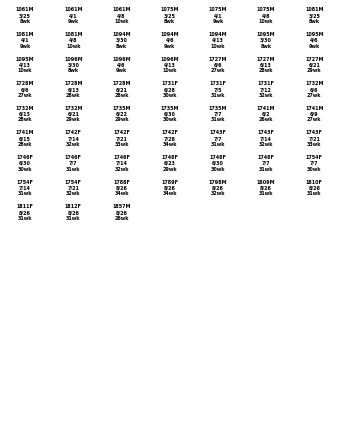

In [41]:
fig, axs = plt.subplots(figsize=(8.5, 11), nrows=17, ncols=7, dpi=50, 
                        gridspec_kw=dict(wspace=0.2, hspace=0.15))
sns.despine(left=True, bottom=True)
for ax, (i, row) in zip(axs.ravel(), df.iterrows()):
#     print(i, row)
    date = row['date']
    date = datetime.datetime.strptime(str(date), "%Y%m%d").date()   

    ax.text(0.5, 0.5, 
            f'{row["rat"]}\n{date.month}/{date.day}\n{row["week"]}wk',
            fontsize=7, fontweight='semibold',
            ha='center', va='center')
for ax in axs.ravel():   
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig('../reports/cryobaby_labels/test.pdf', dpi=300, bbox_inches='tight')